# Clustering Algorithm : Hierarchical Algorithm

## Importing package

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

In [3]:
df = pd.read_csv('D14data1.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
#input data
x = df.iloc[:,[3,4]].values

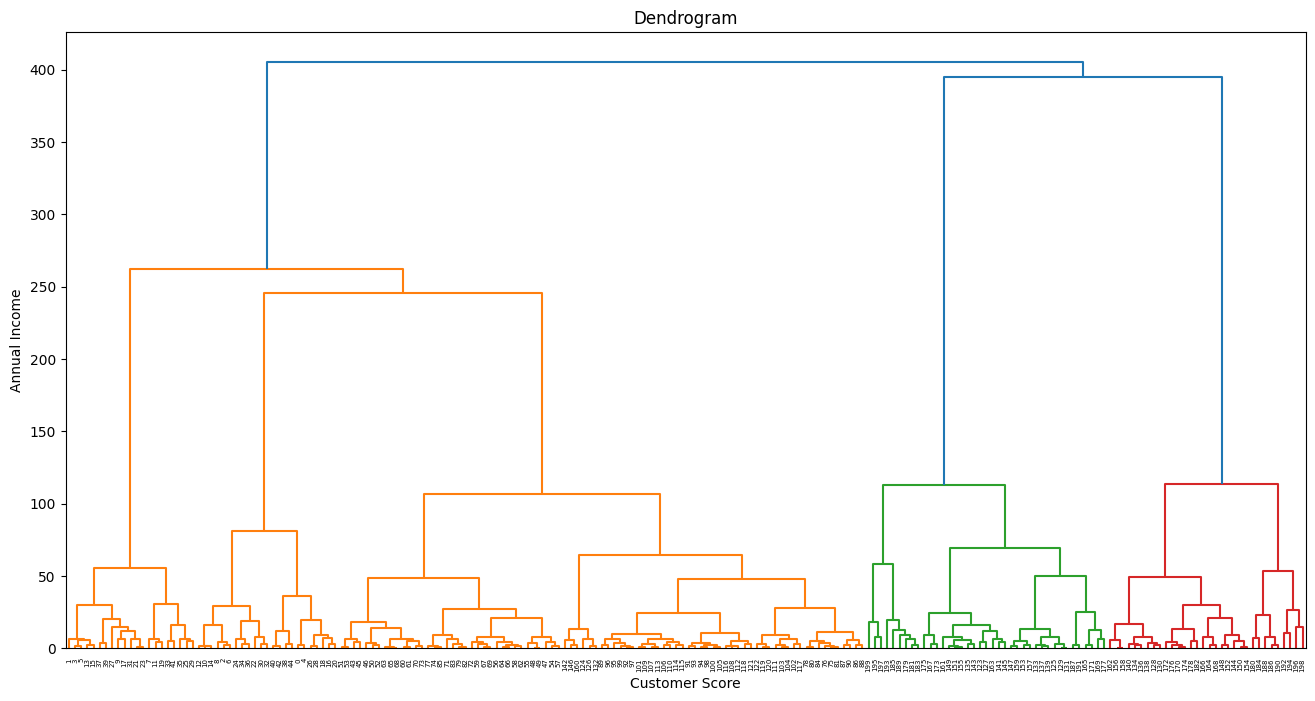

In [10]:
plt.figure(figsize = (16,8))
dendrogram = sch.dendrogram(sch.linkage(x,method ='ward'))
plt.title('Dendrogram')
plt.xlabel('Customer Score')
plt.ylabel('Annual Income')
plt.xticks(rotation = 90)
plt.show()

## Training dataset for hierarchical clustering

In [11]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


## Visualize the clusters

Text(0, 0.5, 'Annual Income')

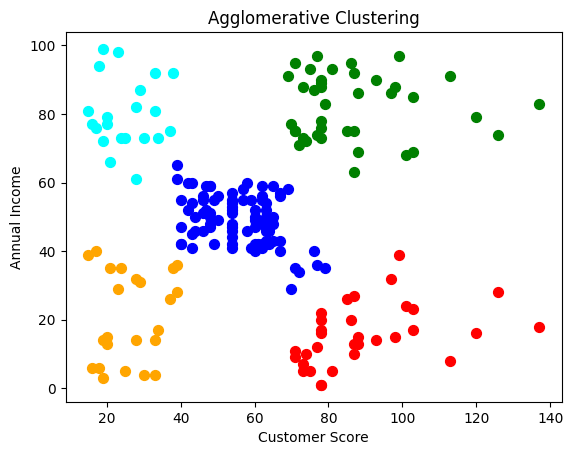

In [14]:
plt.scatter(x[y_hc == 0,0],x[y_hc == 0,1],s=50, c='red')
plt.scatter(x[y_hc == 1,0],x[y_hc == 1,1],s=50, c='blue')
plt.scatter(x[y_hc == 2,0],x[y_hc == 2,1],s=50, c='green')
plt.scatter(x[y_hc == 3,0],x[y_hc == 3,1],s=50, c='cyan')
plt.scatter(x[y_hc == 4,0],x[y_hc == 4,1],s=50, c='orange')
plt.title('Agglomerative Clustering')
plt.xlabel('Customer Score')
plt.ylabel('Annual Income')